In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 폰트 설치
import os
if not os.path.exists('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'):
    print(">>> 폰트 설치 중... (시간이 좀 걸립니다)")
    !sudo apt-get install -y fonts-nanum
    !sudo fc-cache -fv
    !rm ~/.cache/matplotlib -rf
    print(">>> 설치 완료!")

!pip install scikit-learn seaborn matplotlib tabulate

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
    print(f"한글 폰트 설정 성공: {font_name}")
else:
    print("폰트 파일이 없습니다. 위 설치 코드가 실패했을 수 있습니다.")

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6)

# 설정: 불러올 파일명 확인
BASE_PATH = "/content/drive/MyDrive/assignment5"
LOAD_FILENAME = "val_results_v5.csv"
RESULT_FILE = os.path.join(BASE_PATH, LOAD_FILENAME)

if os.path.exists(RESULT_FILE):
    print(f"분석 데이터 로드 준비 완료: {RESULT_FILE}")
else:
    print(f"파일 찾기 실패: {RESULT_FILE}")
    print(f"   폴더 내 파일 목록: {os.listdir(BASE_PATH)}")

Mounted at /content/drive
>>> 폰트 설치 중... (시간이 좀 걸립니다)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,754 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fo

Validation 결과 로드 완료: 135건

   [1] 전체 성능 평가 (Overall Performance)   
| 구분        |   Accuracy |   Macro Precision |   Macro Recall |   Macro F1 |
|:------------|-----------:|------------------:|---------------:|-----------:|
| 전체 관련도 |     0.8593 |            0.8598 |         0.8565 |     0.8577 |
| 전체 중요도 |     0.8296 |            0.7507 |         0.836  |     0.7742 |
| 전체 통합   |     0.7407 |            0.7013 |         0.7681 |     0.7199 |

>>> 전체 데이터 Confusion Matrix


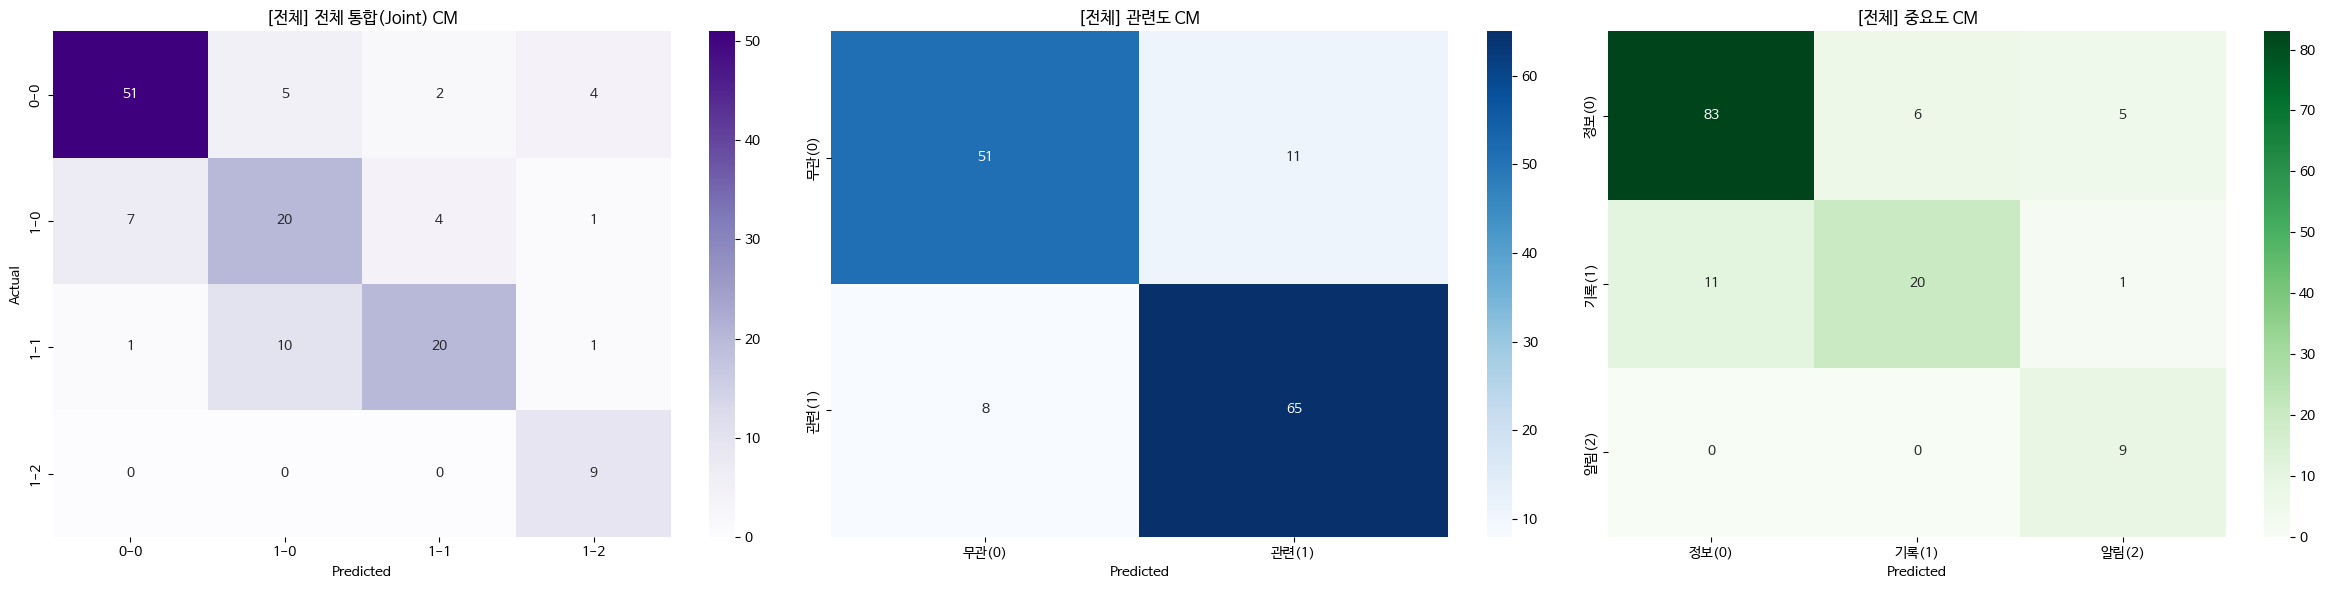


   [2] 카테고리별 상세 분석 (Category-wise)   

>>> 카테고리: 공지(일반) (개수=44)


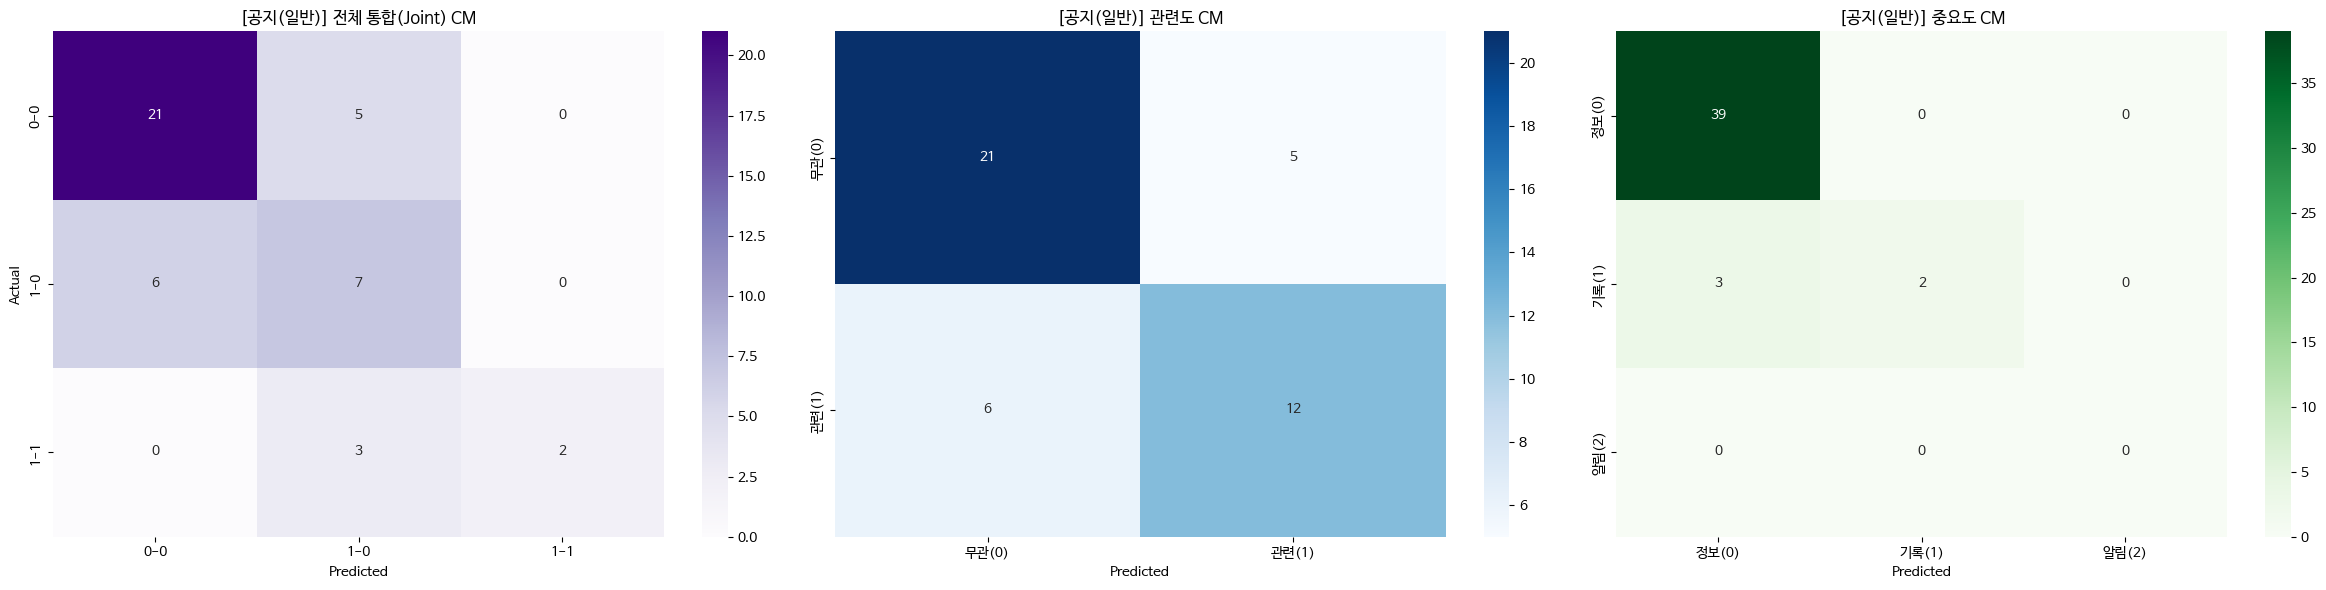


>>> 카테고리: 장학 (개수=30)


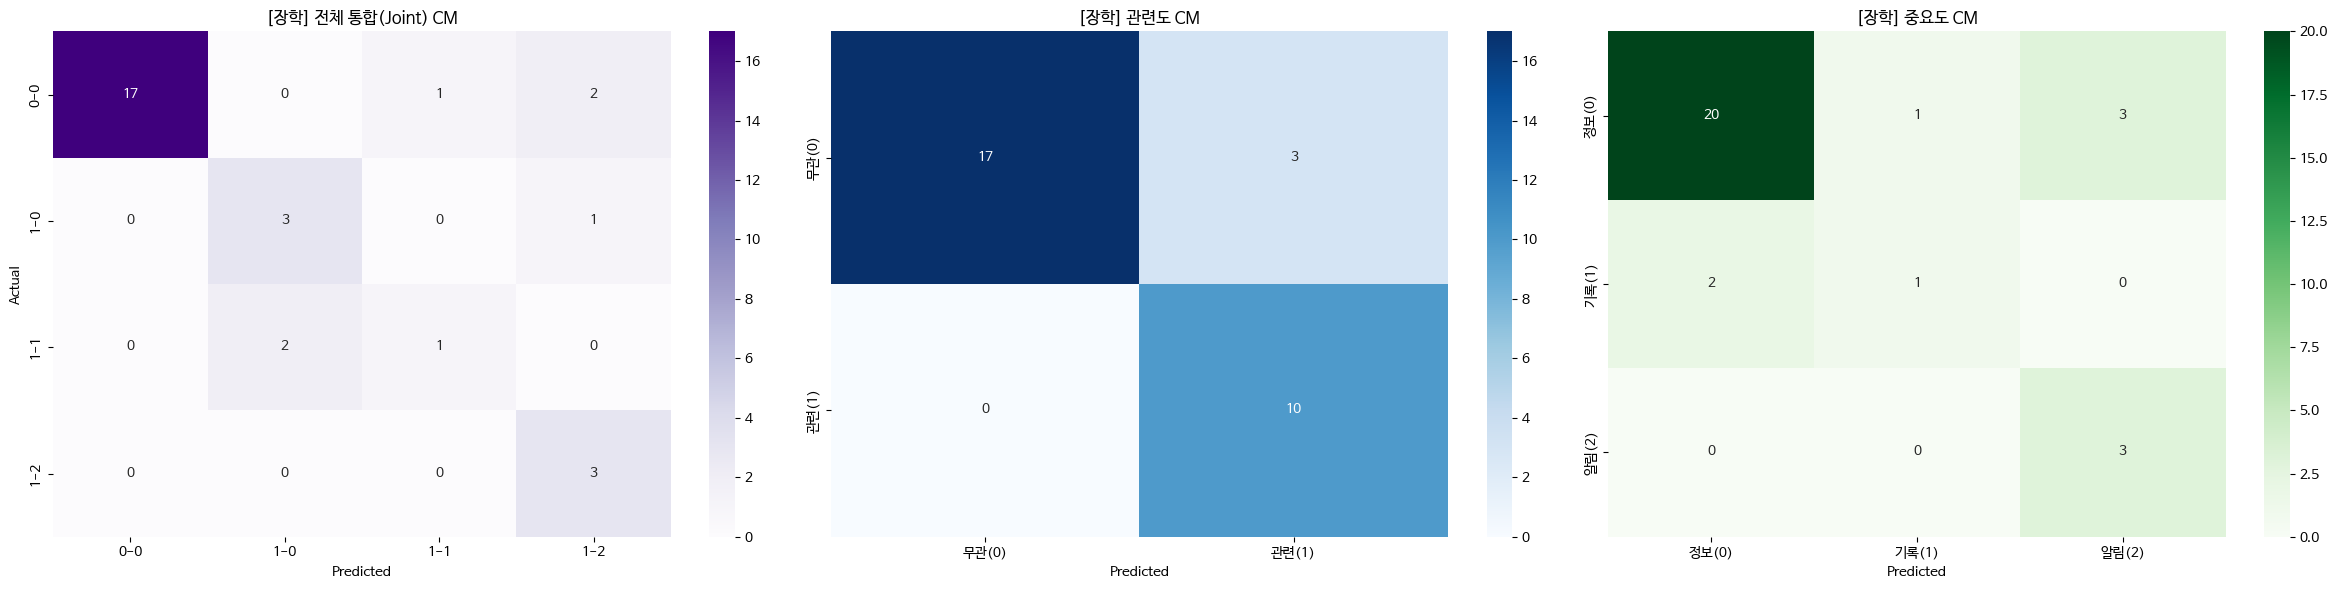


>>> 카테고리: IEL (개수=20)


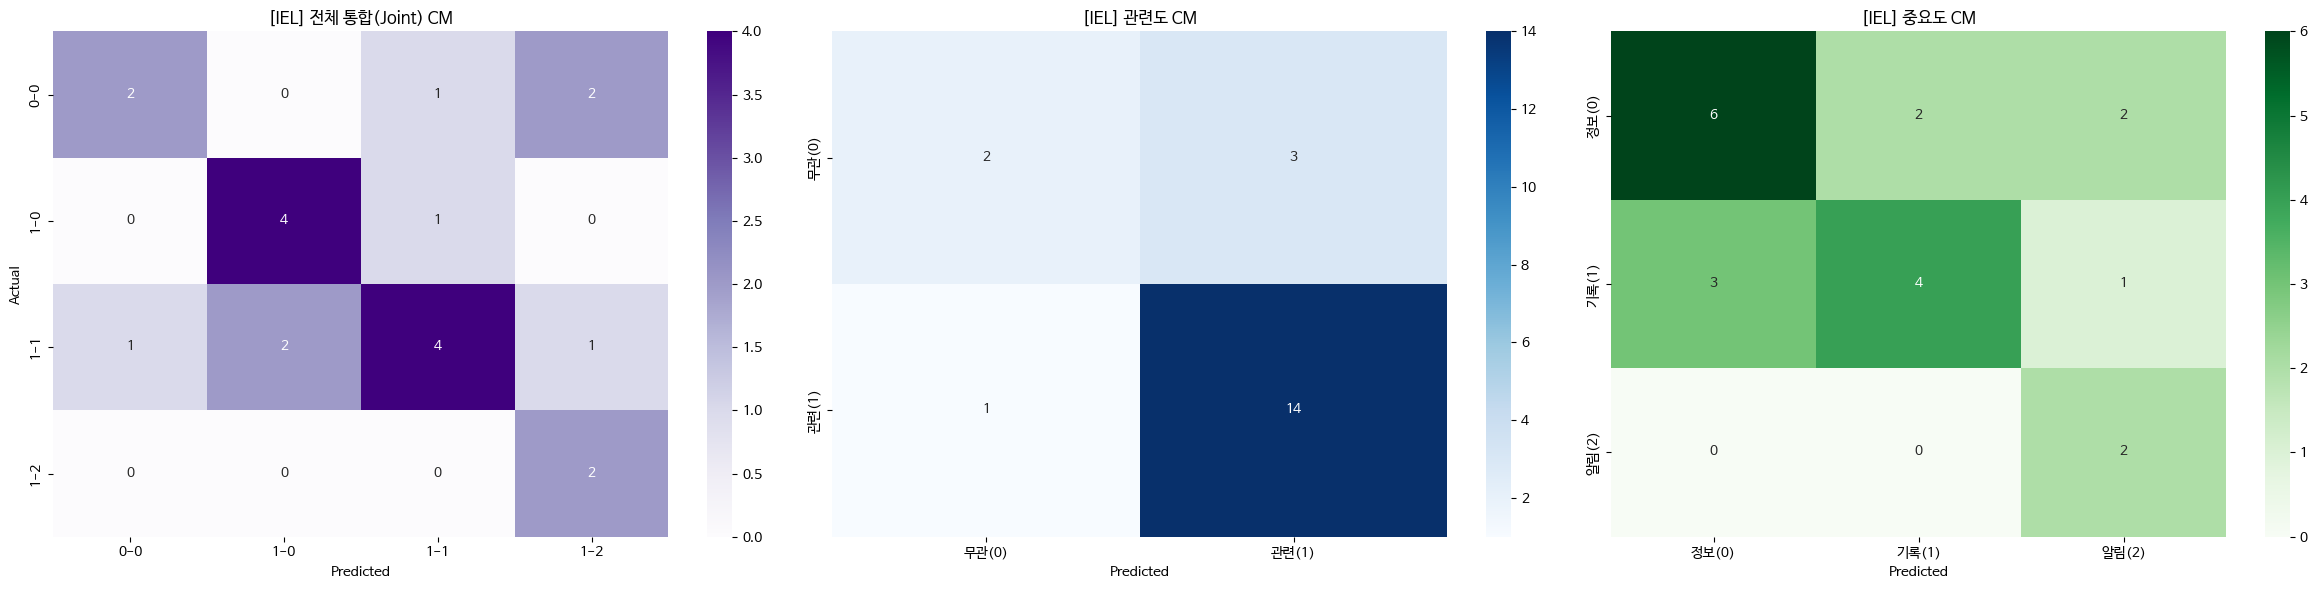


>>> 카테고리: LAI (개수=23)


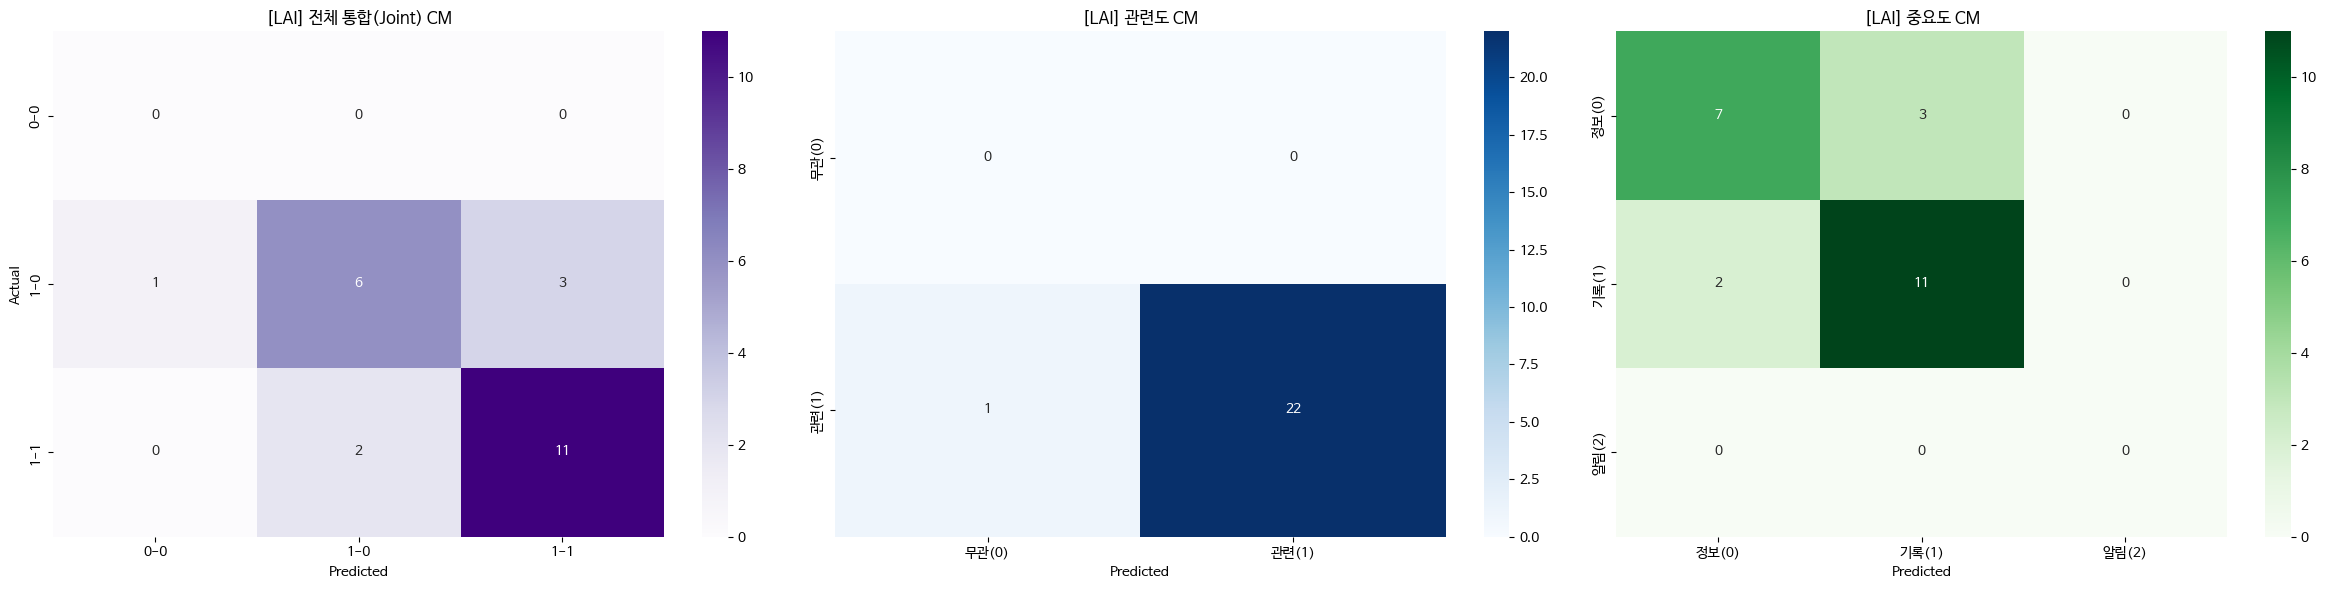


>>> 카테고리: 학사 (개수=18)


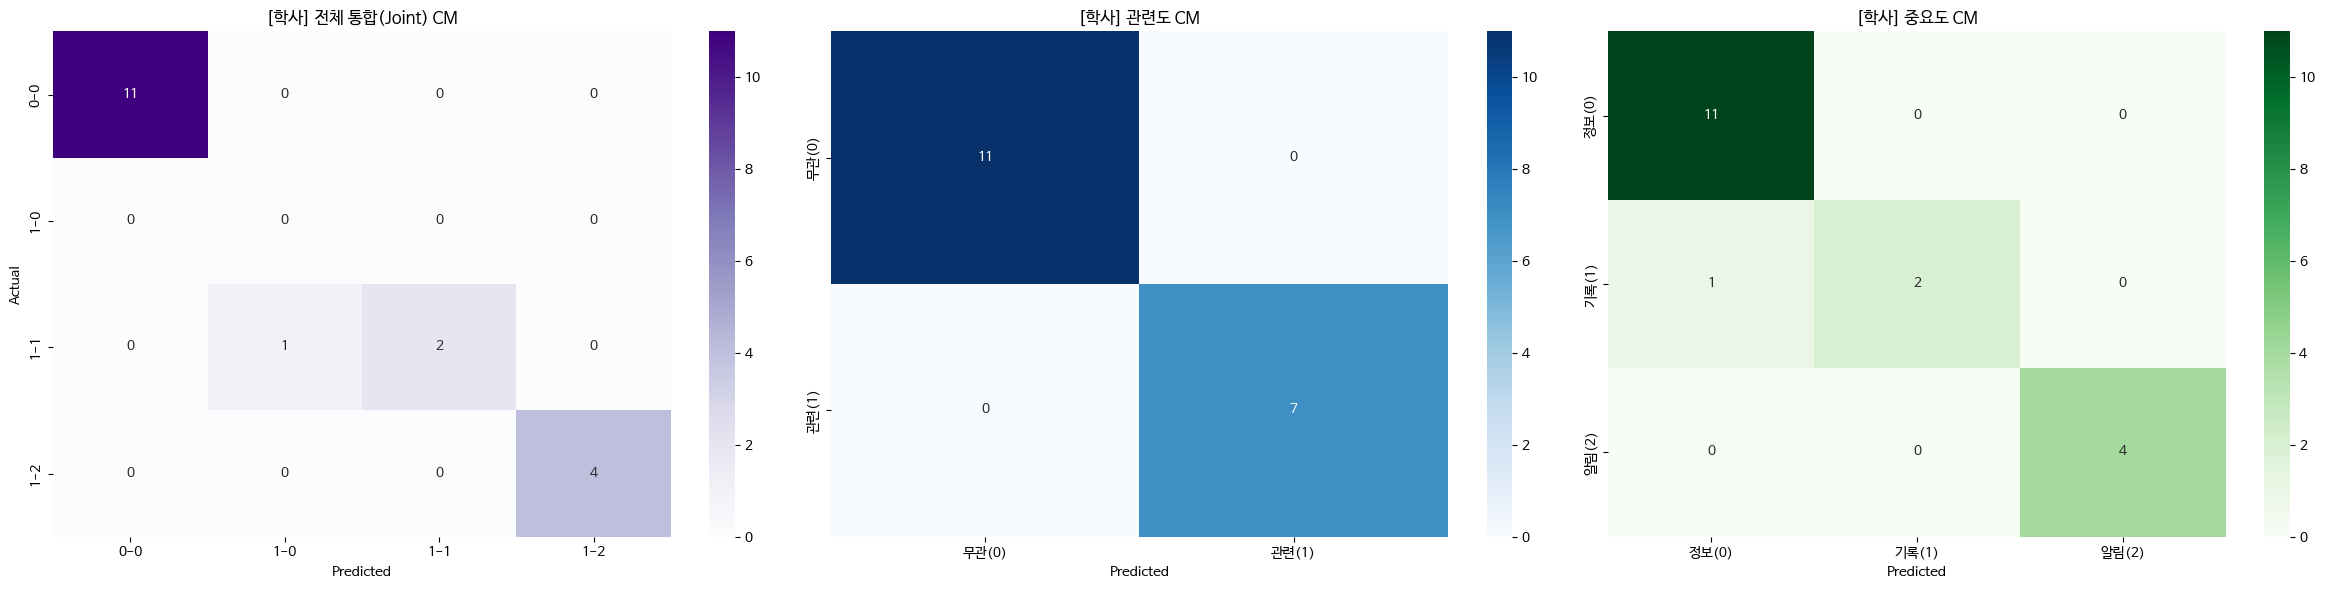


   [3] 카테고리별 성능 요약표 (Macro Average 기준)   
| 카테고리     |   개수 |   관련도_Acc |   관련도_Macro_P |   관련도_Macro_R |   관련도_Macro_F1 |   중요도_Acc |   중요도_Macro_P |   중요도_Macro_R |   중요도_Macro_F1 |   전체_Acc |   전체_Macro_P |   전체_Macro_R |   전체_Macro_F1 |
|:-------------|-------:|-------------:|-----------------:|-----------------:|------------------:|-------------:|-----------------:|-----------------:|------------------:|-----------:|---------------:|---------------:|----------------:|
| 공지(일반)   |     44 |       0.75   |           0.7418 |           0.7372 |            0.7391 |       0.9318 |           0.9643 |           0.7    |            0.7672 |     0.6818 |         0.7481 |         0.5821 |          0.6213 |
| 장학         |     30 |       0.9    |           0.8846 |           0.925  |            0.8942 |       0.8    |           0.6364 |           0.7222 |            0.6454 |     0.8    |         0.65   |         0.7333 |          0.6631 |
| IEL          |     20 |       0.8    |           0.

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

if not os.path.exists(RESULT_FILE):
    print(f"파일을 찾을 수 없습니다: {RESULT_FILE}")
else:
    val_df = pd.read_csv(RESULT_FILE)
    print(f"Validation 결과 로드 완료: {len(val_df)}건")

    # 데이터 전처리: 통합 라벨(Joint Label) 생성
    val_df['label_joint'] = val_df['label_relevance'].astype(str) + "-" + val_df['label_importance'].astype(str)
    val_df['pred_joint'] = val_df['pred_rel'].astype(str) + "-" + val_df['pred_imp'].astype(str)

    # 함수 정의
    def get_metrics(y_true, y_pred):
        """Accuracy, Macro P, R, F1 반환"""
        acc = accuracy_score(y_true, y_pred)
        p, r, f, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
        return acc, p, r, f

    def plot_3_cm(df, title_prefix=""):
        """
        한 줄에 3개의 Confusion Matrix를 출력 (통합 -> 관련도 -> 중요도)
        """
        fig, axes = plt.subplots(1, 3, figsize=(24, 6))

        # (1) 통합 (Joint) CM
        joint_labels = sorted(list(set(df['label_joint'].unique()) | set(df['pred_joint'].unique())))
        cm_joint = confusion_matrix(df['label_joint'], df['pred_joint'], labels=joint_labels)
        sns.heatmap(cm_joint, annot=True, fmt='d', cmap='Purples', ax=axes[0],
                    xticklabels=joint_labels, yticklabels=joint_labels)
        axes[0].set_title(f"{title_prefix} 전체 통합(Joint) CM")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")

        # (2) 관련도 (Relevance) CM
        rel_labels = [0, 1]
        rel_names = ["무관(0)", "관련(1)"]
        cm_rel = confusion_matrix(df['label_relevance'], df['pred_rel'], labels=rel_labels)
        sns.heatmap(cm_rel, annot=True, fmt='d', cmap='Blues', ax=axes[1],
                    xticklabels=rel_names, yticklabels=rel_names)
        axes[1].set_title(f"{title_prefix} 관련도 CM")
        axes[1].set_xlabel("Predicted")

        # (3) 중요도 (Importance) CM
        imp_labels = [0, 1, 2]
        imp_names = ["정보(0)", "기록(1)", "알림(2)"]
        cm_imp = confusion_matrix(df['label_importance'], df['pred_imp'], labels=imp_labels)
        sns.heatmap(cm_imp, annot=True, fmt='d', cmap='Greens', ax=axes[2],
                    xticklabels=imp_names, yticklabels=imp_names)
        axes[2].set_title(f"{title_prefix} 중요도 CM")
        axes[2].set_xlabel("Predicted")

        plt.tight_layout()
        plt.show()

    # 전체 성능 평가
    print("\n" + "="*80)
    print("   [1] 전체 성능 평가 (Overall Performance)   ")
    print("="*80)

    # 전체 데이터에 대한 메트릭 계산 (나중에 표에 넣기 위해 변수에 저장)
    rel_acc, rel_p, rel_r, rel_f1 = get_metrics(val_df['label_relevance'], val_df['pred_rel'])
    imp_acc, imp_p, imp_r, imp_f1 = get_metrics(val_df['label_importance'], val_df['pred_imp'])
    joint_acc, joint_p, joint_r, joint_f1 = get_metrics(val_df['label_joint'], val_df['pred_joint'])

    # 상단 요약표 출력
    overall_data = [
        {"구분": "전체 관련도", "Accuracy": rel_acc, "Macro Precision": rel_p, "Macro Recall": rel_r, "Macro F1": rel_f1},
        {"구분": "전체 중요도", "Accuracy": imp_acc, "Macro Precision": imp_p, "Macro Recall": imp_r, "Macro F1": imp_f1},
        {"구분": "전체 통합",   "Accuracy": joint_acc, "Macro Precision": joint_p, "Macro Recall": joint_r, "Macro F1": joint_f1}
    ]
    print(pd.DataFrame(overall_data).round(4).to_markdown(index=False))

    # 전체 데이터 Confusion Matrix
    print("\n>>> 전체 데이터 Confusion Matrix")
    plot_3_cm(val_df, title_prefix="[전체]")

    # 4. 카테고리별 상세 평가
    print("\n" + "="*80)
    print("   [2] 카테고리별 상세 분석 (Category-wise)   ")
    print("="*80)

    categories = val_df['eval_category'].unique()
    summary_data = []

    for cat in categories:
        sub = val_df[val_df['eval_category'] == cat]
        if len(sub) == 0: continue

        r_acc, r_p, r_r, r_f = get_metrics(sub['label_relevance'], sub['pred_rel'])
        i_acc, i_p, i_r, i_f = get_metrics(sub['label_importance'], sub['pred_imp'])
        j_acc, j_p, j_r, j_f = get_metrics(sub['label_joint'], sub['pred_joint'])

        summary_data.append({
            "카테고리": cat, "개수": len(sub),
            "관련도_Acc": r_acc, "관련도_Macro_P": r_p, "관련도_Macro_R": r_r, "관련도_Macro_F1": r_f,
            "중요도_Acc": i_acc, "중요도_Macro_P": i_p, "중요도_Macro_R": i_r, "중요도_Macro_F1": i_f,
            "전체_Acc": j_acc, "전체_Macro_P": j_p, "전체_Macro_R": j_r, "전체_Macro_F1": j_f
        })

        print(f"\n>>> 카테고리: {cat} (개수={len(sub)})")
        plot_3_cm(sub, title_prefix=f"[{cat}]")

    # 최종 요약 표 출력
    print("\n" + "="*80)
    print("   [3] 카테고리별 성능 요약표 (Macro Average 기준)   ")
    print("="*80)

    summary_data.append({
        "카테고리": "전체 (Total)", "개수": len(val_df),
        "관련도_Acc": rel_acc, "관련도_Macro_P": rel_p, "관련도_Macro_R": rel_r, "관련도_Macro_F1": rel_f1,
        "중요도_Acc": imp_acc, "중요도_Macro_P": imp_p, "중요도_Macro_R": imp_r, "중요도_Macro_F1": imp_f1,
        "전체_Acc": joint_acc, "전체_Macro_P": joint_p, "전체_Macro_R": joint_r, "전체_Macro_F1": joint_f1
    })

    summary_df = pd.DataFrame(summary_data)

    cols = ["카테고리", "개수",
            "관련도_Acc", "관련도_Macro_P", "관련도_Macro_R", "관련도_Macro_F1",
            "중요도_Acc", "중요도_Macro_P", "중요도_Macro_R", "중요도_Macro_F1",
            "전체_Acc", "전체_Macro_P", "전체_Macro_R", "전체_Macro_F1"]

    print(summary_df[cols].round(4).to_markdown(index=False))